# 決定木を触ってみる 

### 不純度を見てみる

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ジニ不純度
def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))

# エントロピー関数
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

# 分類誤差
def error(p):
    return 1 - np.max([p, 1-p])

# 確率を疑似的に生成
x = np.arange(0.0, 1.0, 0.01)

# entropyとerrorを計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

In [4]:
ent

[None,
 0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.36592365090022333,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812,
 0.499915958164528,
 0.5293608652873644,
 0.557438185027989,
 0.584238811642856,
 0.6098403047164004,
 0.6343095546405662,
 0.6577047787442195,
 0.6800770457282798,
 0.7014714598838974,
 0.7219280948873623,
 0.7414827399312737,
 0.7601675029619657,
 0.7780113035465377,
 0.7950402793845223,
 0.8112781244591328,
 0.8267463724926178,
 0.8414646362081757,
 0.8554508105601306,
 0.8687212463394045,
 0.8812908992306927,
 0.8931734583778568,
 0.9043814577244939,
 0.9149263727797275,
 0.9248187049730301,
 0.934068055375491,
 0.9426831892554922,
 0.9506720926870659,
 0.9580420222262995,
 0.9647995485050872,
 0.9709505944546686,
 0.976500468757824,
 0.9814538950336535,
 0.9858150371789197,
 0.9895875212220556,
 0.9927744539878083,
 0.9953784388202257,
 0.9974015885677396,
 0.9

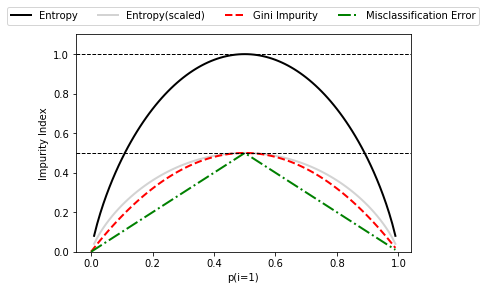

In [3]:
# 図で表現
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
# 凡例
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

# 2本の水線の波線
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

# 軸の設定
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### 決定木を構築してみる

In [4]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Irisデータセット
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# データを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

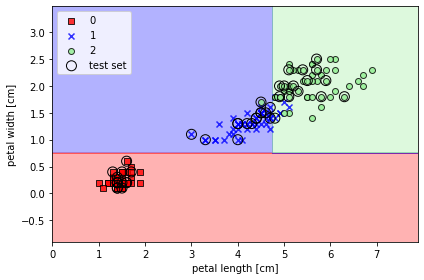

In [10]:
from sklearn.tree import DecisionTreeClassifier

# entropyを不純度の指標に使う
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_depth3_png')

True

### ランダムフォレスト

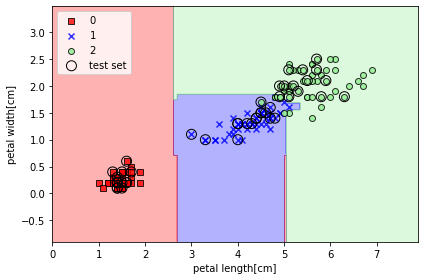

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()